## Mini Project: What are the average Green House Gas emmissions for multiple companies and organizations in the United States?

### URL: https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6
### Description: This data set consists of data originating from various industry chains across the United States.
### Time: 2022
### Why: I chose this because this data set includes data regarding emissions for a variety of different companies and industry supply chains.

In [14]:
import pandas as pd
df = pd.read_csv("SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv")
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [16]:
df.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,424917.376969,0.264994,0.016945,0.281898
std,164942.113495,0.314768,0.023367,0.321417
min,111110.000000,0.026000,0.000000,0.029000
25%,325588.250000,0.103000,0.000000,0.108000
50%,423700.000000,0.159000,0.000000,0.173000
75%,532111.250000,0.302250,0.030250,0.329250
max,813990.000000,3.846000,0.125000,3.924000


In [17]:
missing_summary = df.isnull().sum()

##### No missing values were found.

In [18]:
duplicates = df.duplicated()
df_cleaned = df.drop_duplicates()

In [19]:
df_cleaned["2017 NAICS Code"] = df_cleaned["2017 NAICS Code"].astype(str)  # Keep as string for categorical use
numeric_cols = [
    "Supply Chain Emission Factors without Margins",
    "Margins of Supply Chain Emission Factors",
    "Supply Chain Emission Factors with Margins"
]
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [20]:
valid_range = df_cleaned[numeric_cols].apply(lambda x: x.between(0, 10)).all()
valid_ghg = df_cleaned["GHG"].unique()
valid_units = df_cleaned["Unit"].unique()

##### Not many changes were made, only converted numeric columns to float, and NAICS to str.

In [21]:
df_cleaned["NAICS Sector"] = df_cleaned["2017 NAICS Code"].str[:2]
sector_summary = df_cleaned.groupby("NAICS Sector")[
    "Supply Chain Emission Factors with Margins"
].mean().reset_index().rename(columns={
    "Supply Chain Emission Factors with Margins": "Avg Emissions (kg CO2e/USD)"
})
sector_summary = sector_summary.sort_values(by="Avg Emissions (kg CO2e/USD)", ascending=False)
sector_summary.head()

,NAICS Sector,Avg Emissions (kg CO2e/USD)
0,11,0.726625
2,22,0.566500
10,48,0.558240
5,32,0.531330
1,21,0.432321


##### Averaged all the sectors and displayed the top five most expensive ones. This supports my research because it shows exactly the highest producers of emissions and what organizations to look out for.

In [22]:
high_emitters = df_cleaned[df_cleaned["Supply Chain Emission Factors with Margins"] > 1.0]
high_emitters[[
    "2017 NAICS Code",
    "2017 NAICS Title",
    "Supply Chain Emission Factors with Margins"
]].sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head()

,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors with Margins
285,327310,Cement Manufacturing,3.924
30,112111,Beef Cattle Ranching and Farming,2.893
33,112130,Dual-Purpose Cattle Ranching and Farming,2.893
31,112112,Cattle Feedlots,2.893
32,112120,Dairy Cattle and Milk Production,1.724


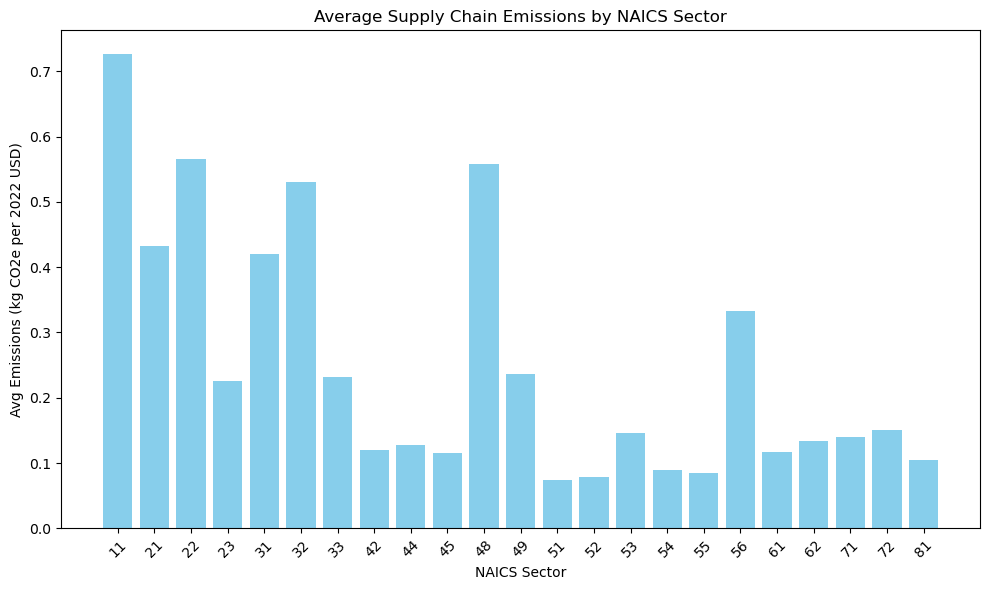

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned["NAICS Sector"] = df_cleaned["2017 NAICS Code"].str[:2]

sector_summary = df_cleaned.groupby("NAICS Sector")[
    "Supply Chain Emission Factors with Margins"
].mean().reset_index().rename(columns={
    "Supply Chain Emission Factors with Margins": "Avg Emissions (kg CO2e/USD)"
})

plt.figure(figsize=(10, 6))
plt.bar(sector_summary["NAICS Sector"], sector_summary["Avg Emissions (kg CO2e/USD)"], color='skyblue')
plt.title("Average Supply Chain Emissions by NAICS Sector")
plt.xlabel("NAICS Sector")
plt.ylabel("Avg Emissions (kg CO2e per 2022 USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### In general, this bar chart shows the average supply chain emissions by the NAICS sector, by using an averaged value for each sector type.

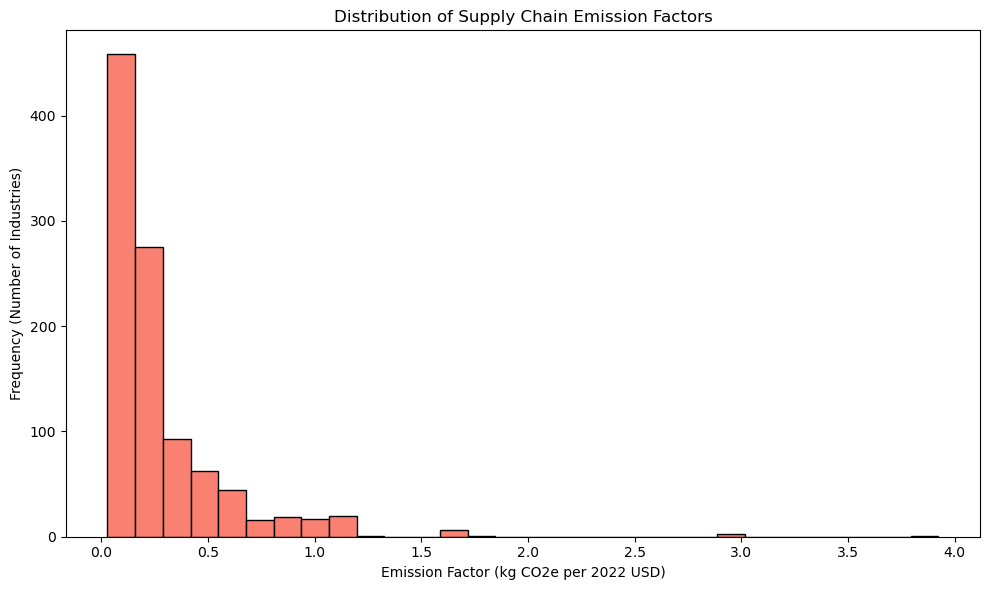

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["Supply Chain Emission Factors with Margins"], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Supply Chain Emission Factors")
plt.xlabel("Emission Factor (kg CO2e per 2022 USD)")
plt.ylabel("Frequency (Number of Industries)")
plt.tight_layout()
plt.show()

##### This histogram displays exactly how emissions are distributed across the various industries.